# Polarización Inducida

In [1]:
import numpy as np 
import pygimli as pg 
from pygimli.physics import ert 
import pygimli.meshtools as mt

In [2]:
world = mt.createWorld(start=[-50, 0], end=[50, -50], layers=[-6, -15], worldMarker=False)
block = mt.createCircle(pos=[-5, -11], radius=[4, 2], marker = 4, boundaryMarker=10)
poly = mt.createPolygon([(1, -4), (2, -1.5), (4, -2), (5, -2), 
                         (8, -3), (5, -3.5), (3, -4.5)], 
                        isClosed=True, marker=5, addNodes=3, 
                        interpolate="spline")

geom = world + block + poly

(<Axes: >, None)

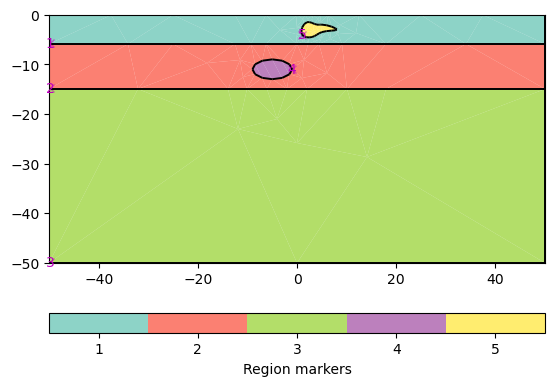

In [3]:
pg.show(geom)

In [4]:
scheme = ert.createData(elecs=np.linspace(start=-30, stop=30, num=64), schemeName='dd')

In [5]:
for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

In [6]:
mesh = mt.createMesh(geom, quality=34)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x28836826e80>)

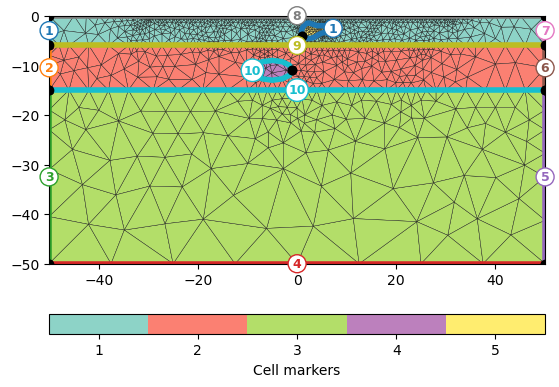

In [7]:
pg.show(mesh, markers=True, showMesh=True, boundaryMarker=False)

## Simulación en el Dominio del Tiempo

In [8]:
res = np.array([0, 100., 250., 400., 1., 10.]) #Como vector, se inicia en 0 porque los datos van desde 0
m = np.array([0, 0, 0, 0, 0.1, 0])

In [9]:
mgr = ert.ERTIPManager()

In [10]:
dataTD = mgr.simulate(mesh=mesh, scheme=scheme, res=res, m=m)

15/02/24 - 22:13:58 - pyGIMLi - INFO - Found 1 regions.
15/02/24 - 22:13:58 - pyGIMLi - INFO - Creating forward mesh from region infos.


Mesh: Nodes: 1961 Cells: 3482 Boundaries: 5442 3482 3482


15/02/24 - 22:13:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 22:13:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7403 Cells: 13928 Boundaries: 10884
15/02/24 - 22:15:37 - pyGIMLi - INFO - Found 5 regions.
15/02/24 - 22:15:37 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)


In [11]:
dataTD.save('Synthetic_IP.dat')

1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x28836920880>)

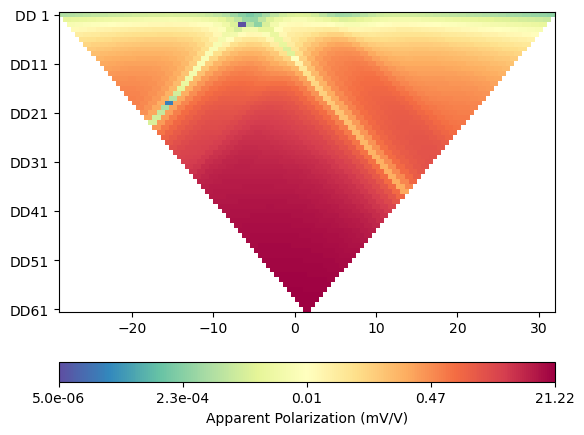

In [12]:
dataTD.show("ip", label = "Apparent Polarization (mV/V)", logScale=True)

In [13]:
import pandas as pd
import seaborn as sns

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

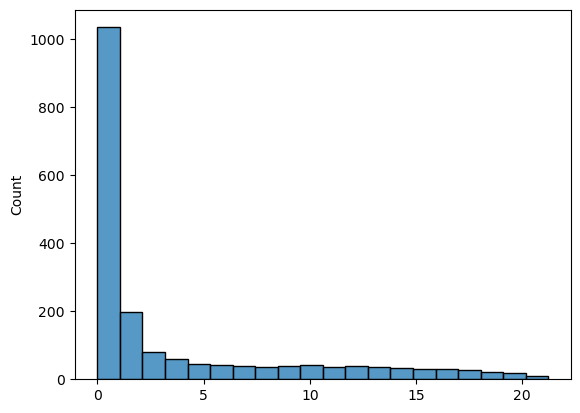

In [14]:
sns.histplot(dataTD["ip"], bins=20)

c:\Users\ASUS i5\miniconda3\envs\pg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

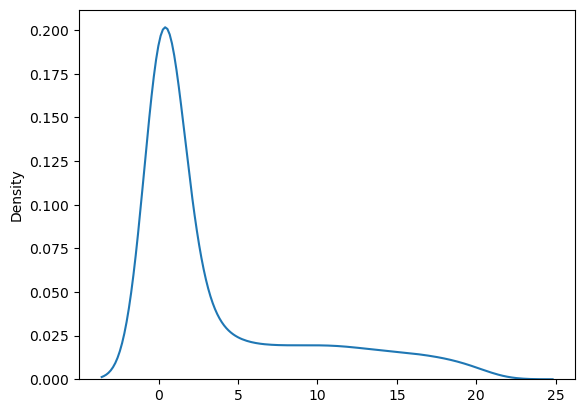

In [15]:
sns.kdeplot(dataTD["ip"])

## Inversión de los datos sintéticos

In [16]:
dataTD["err"] = ert.estimateError(dataTD)

In [17]:
mgr = ert.ERTIPManager(dataTD) #Porque en datos sintéticos si se le ponen los datos entre ()

In [18]:
mgr.invert(verbose=True) #Primero inversión de tomografía, luego de IP

15/02/24 - 22:54:10 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 22:54:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


15/02/24 - 22:54:10 - pyGIMLi - INFO - Found 2 regions.
15/02/24 - 22:54:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
15/02/24 - 22:54:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
15/02/24 - 22:54:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
15/02/24 - 22:54:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2633 Cells: 4928 Boundaries: 3864
15/02/24 - 22:54:10 - pyGIMLi - INFO - Use median(data values)=98.21379165689629
15/02/24 - 22:54:10 - pyGIMLi - INFO - Created startmodel from forward operator: 970, min/max=98.213792/98.213792
15/02/24 - 22:54:10 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000288727C4A40>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000288727C4B80>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000288727C4C20>
min/max (data): 36.78/144
min/max (error): 3%/3%
min/max (start model): 98.21/98.21
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  105.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.57 (dPhi = 96.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

15/02/24 - 22:54:41 - pyGIMLi - INFO - Found 1 regions.


chi² =    0.78 (dPhi = 63.12%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)                   #
################################################################################


15/02/24 - 22:54:41 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ipModelling.DCIPMModelling object at 0x00000288726127C0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000028872769B80>
Model transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000288727CE360>
min/max (data): 5.0e-09/0.02
min/max (error): 7.71%/2.0e+07%
min/max (start model): 7.5e-04/7.5e-04
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   18.69
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   16.57 (dPhi = 11.08%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.06 (dPhi = 25.54%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.92 (dPhi = 38.26%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.00 (dPhi = 57.87%) lam: 10

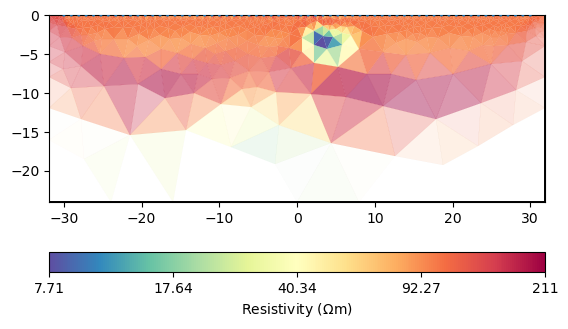

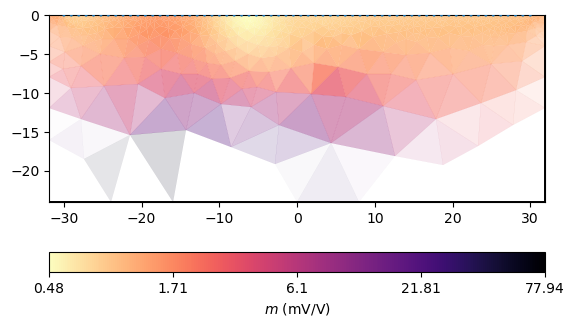

In [19]:
mgr.showResult() #Después de la "t" se puede colocar "AndFit" y salen los 3 cuadros
ax, cb = mgr.showIPModel() #Modelo directo es para modificarlo y ver cuál se ajusta